In [1]:
import pandas as pd

#loading dataset 

df = pd.read_csv('ad.csv')
df.head()

,index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
#Dropping values from dataset
#'inplace' means changes happens in the same dataset we are working on

df.drop(['index'],inplace=True,axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#Making x and y axis 
#The X-axis will have TV,radio and newspaper values in it 
#The Y-axis will have sales values in it

X = df.drop(['sales'], axis=1)
y = df['sales']
print(X[:5])
print(y[:5])

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [4]:
#we will know split the dataset according to our need
# default split is 75% for training and 25% for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1) 

#printing the details of our dataset after splitting 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 3)
(50, 3)
(150,)
(50,)


In [5]:
#importing Linear Regression Model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#fitting our model
reg.fit(x_train, y_train)

LinearRegression()

In [6]:
#Let's get the slope and intercept of our linear regression line 
#slopes will be an array for our 3 columns

print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

Slope:  [0.04656457 0.17915812 0.00345046]
Intercept:  2.8769666223179318


In [7]:
print("y = 0.04656457x1 + 0.17915812x2 + 0.00345046x3 + 2.87696662231793")
#this is our multiple linear regression line

y = 0.04656457x1 + 0.17915812x2 + 0.00345046x3 + 2.87696662231793


In [8]:
#let's make predictions on our testing dataset 

y_pred = reg.predict(x_test)

#printing only first 5 values of the array 
print(y_pred[:5])

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359 ]


In [9]:
#let's see what were the values in the dataset for our testing dataset

print(y_test[:5])

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64


In [10]:
#writing function to predict random values for us


def myfunc(TV,radio,newspaper):
  Y =  2.87696662231793 + 0.04656457*TV + 0.04656457*radio + 0.04656457*newspaper
  return Y
predictedsales = myfunc(39.5,41.1,10.8)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  7.1329683203179295


In [11]:
#let's get the error in prediction values 

from sklearn.metrics import mean_squared_error,mean_absolute_error 
import numpy as np

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error = ",mae)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error = ",mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  1.0668917082595215
Mean Squared Error =  1.9730456202283397
Root Mean Squared Error =  1.404651423032896


In [12]:
#Regression score - telling us how good our model is!
reg.score(X, y)

0.8963161233045729

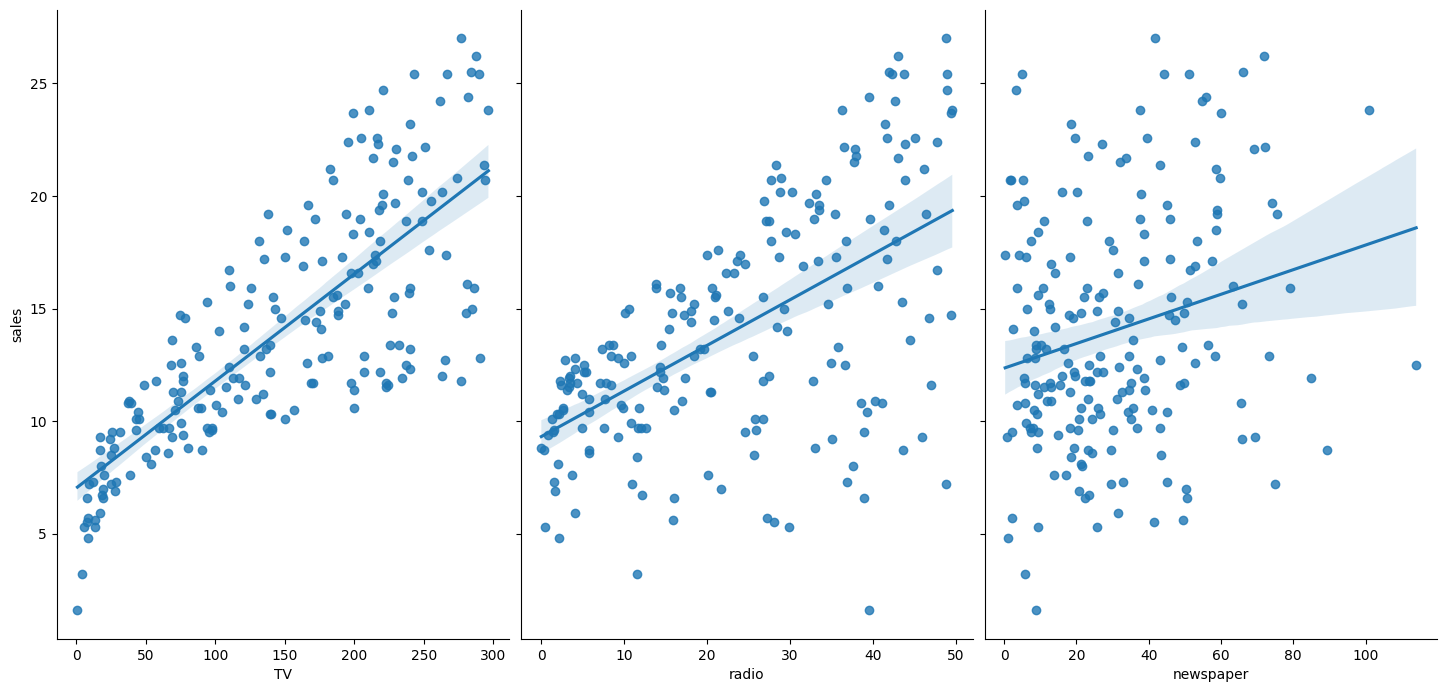

In [14]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')